**Очень много коллинеарных признаков. Их необходимо удалить.**

**Feature selector** - это инструмент для уменьшения размерности наборов данных машинного обучения.

Существует пять методов, используемых для определения объектов для удаления:

   - Отсутствующие значения
   - Одиночные уникальные значения
   - Коллинеарные признаки
   - Признаки нулевой важности
   - Признаки с низкой важностью

https://github.com/WillKoehrsen/feature-selector

In [1]:
# требуется установка библиотеки LightGBM
#!pip install lightgbm

In [2]:
from feature_selector.feature_selector import FeatureSelector

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn
%matplotlib inline

Загружаем датасеты. Так как при отборе признаков выявленные корреляционные зависимости оказались другие, то сделаем анализ на df_2020. Возможно изменение списка признаков, которые мы скармливаем модели улучшат метрики на тесте df_2021

In [4]:
df = pd.read_csv('database/df_2020_full.csv')
target = pd.read_csv('database/target_2020_01_full.csv')
target = target['target_2020 01']

In [5]:
# Считаем признаки для постоянных клиентов. Раннее проверялась их корреляция - все было норм
file = open('feature_list/f_for_pastreded_client.txt', 'r')
list_f_for_pastreded_client = [line.strip() for line in file]
file.close()

In [6]:
# Удали эти признаки из df, тоб произвести отбор для новых клиентов
df = df.drop(list_f_for_pastreded_client, axis=1)

In [7]:
fs = FeatureSelector(data=df, labels=target)

**Коллинеарность признаков**

In [8]:
# Находим коллинеарные признаки с коллинеарностью выше 0,85
fs.identify_collinear(correlation_threshold=0.85)

133 features with a correlation magnitude greater than 0.85.



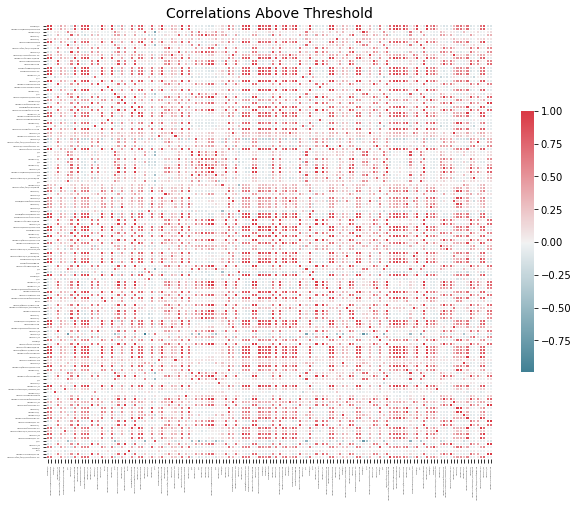

In [9]:
fs.plot_collinear()

Список признаков, которые отобраны для удаления. Запишем в файл.

In [10]:
collinear_fetures = fs.ops['collinear']

In [11]:
# Запись в файл списка признаков
file = open('feature_list/2020/fs_collinear.txt', 'w')
for index in collinear_fetures:
     file.write(index + '\n')
file.close()

Таблица коллинеарности 

In [12]:
df_collinear = fs.record_collinear
df_collinear['corr_value_abs'] = df_collinear['corr_value'].abs()
df_collinear.sort_values('corr_value_abs', ascending=False).head(20)

,drop_feature,corr_feature,corr_value,corr_value_abs
21,Факт 12,Факт 1,1.000000,1.000000
20,Факт 28,Факт 24,1.000000,1.000000
329,Темп прироста 2 f1_690,"Темп прироста 2 Краткосрочные обязательства, RUB",0.999944,0.999944
299,Темп роста 2 f1_690,"Темп роста 2 Краткосрочные обязательства, RUB",0.999939,0.999939
313,Темп прироста 1 f1_690,"Темп прироста 1 Краткосрочные обязательства, RUB",0.999843,0.999843
284,Темп роста 1 f1_690,"Темп роста 1 Краткосрочные обязательства, RUB",0.999828,0.999828
474,Темп прироста 1 f1_190,"Темп прироста 1 Внеоборотные активы, RUB",0.999688,0.999688
464,Темп роста 1 f1_190,"Темп роста 1 Внеоборотные активы, RUB",0.999660,0.999660
658,Ускорение K_18,Темп прироста 2 K_18,0.999626,0.999626
328,Темп прироста 2 f1_690,"Темп роста 2 Краткосрочные обязательства, RUB",0.999524,0.999524


**Важность признаков**

Признаки с нулевой важностью 

In [13]:
fs.identify_zero_importance(task='classification', eval_metric='f1', n_iterations=10, early_stopping=False)
zero_importance_features = fs.ops['zero_importance']
print('Признаки с нулевой значимостью:\n', zero_importance_features)

Training Gradient Boosting Model


35 features with zero importance after one-hot encoding.

Признаки с нулевой значимостью:
 ['Факт 31', 'Факт 32', 'Темп прироста 1 Долгосрочные обязательства, RUB', 'Темп прироста 1 Оборотные активы, RUB', 'Темп прироста 2 Уставный капитал , RUB', 'Факт 24', 'Ускорение Уставный капитал , RUB', 'Факт 23', 'Темп прироста 1 Нематериальные активы, RUB', 'Факт 27', 'Факт 33', 'Темп прироста 1 f1_590', 'Темп прироста 2 Капитал и резервы, RUB', 'Факт 14', 'Факт 12', 'Факт 7', 'Факт 3', 'Факт 2', 'Темп прироста 2 Выручка, RUB', 'Факт 1', 'Факт 39', 'Факт 37', 'Темп прироста 1 Выручка, RUB', 'Факт 58', 'Факт 55', 'Факт 51', 'Факт 50', 'Факт 48', 'Факт 46', 'Факт 42', 'Факт 41', 'Факт 40', 'Факт 30', 'Факт 28', 'Факт 57']


В основном это разные факты, но какие именно - знаем только номера. Сохраним их в файл.

In [14]:
# Запись в файл списка признаков
file = open('feature_list/2020/fs_zero.txt', 'w')
for index in zero_importance_features:
     file.write(index + '\n')
file.close()

График важности признаков

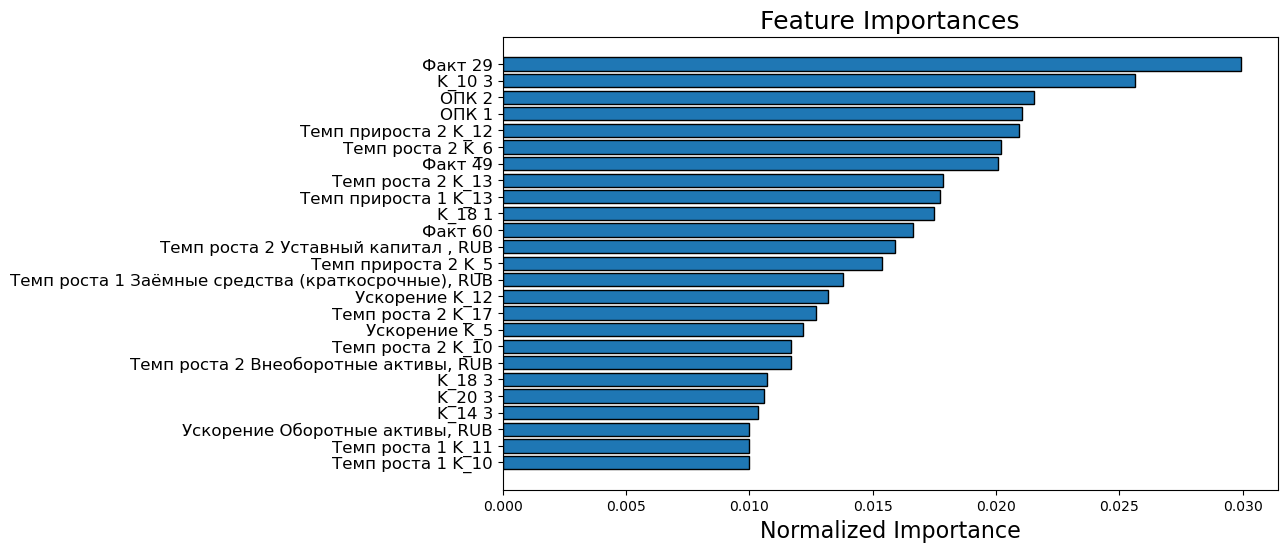

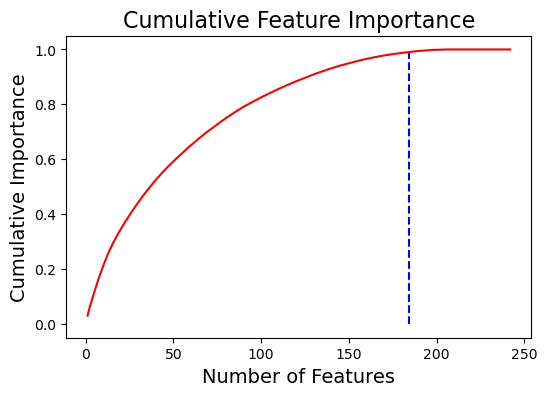

184 features required for 0.99 of cumulative importance


In [15]:
fs.plot_feature_importances(plot_n=25, threshold=0.99)

Состав важности признаков очень изменился по сравнению с отбором на выборке df_2019

Разделение признаков:

In [16]:
fs.identify_low_importance(cumulative_importance=0.99)

183 features required for cumulative importance of 0.99 after one hot encoding.
59 features do not contribute to cumulative importance of 0.99.



In [17]:
df_f_importances_with_collinearity = fs.feature_importances

In [18]:
df_f_importances_with_collinearity.to_csv('database/df_f_importances_with_collinearity_2020.csv', index=False)

**Теперь попробуем удалить коллинеарные признаки и посмотреть на изменение важности признаков**

In [19]:
df_drop_collinear = df.drop(collinear_fetures, axis=1)

In [20]:
fs = FeatureSelector(data=df_drop_collinear, labels=target)

Признаки с нулевой важностью 

In [21]:
fs.identify_zero_importance(task='classification', eval_metric='f1', n_iterations=10, early_stopping=False)
zero_importance_features = fs.ops['zero_importance']
print('Признаки с нулевой значимостью:\n', zero_importance_features)

Training Gradient Boosting Model


24 features with zero importance after one-hot encoding.

Признаки с нулевой значимостью:
 ['Факт 23', 'Факт 32', 'Факт 31', 'Факт 3', 'Факт 24', 'Факт 27', 'Факт 14', 'Факт 1', 'Факт 39', 'Факт 37', 'Факт 58', 'Факт 57', 'Факт 55', 'Факт 51', 'Факт 50', 'Факт 48', 'Факт 46', 'Факт 42', 'Факт 41', 'Факт 40', 'Факт 30', 'Факт 2', 'Факт 33', 'Факт 7']


График важности признаков

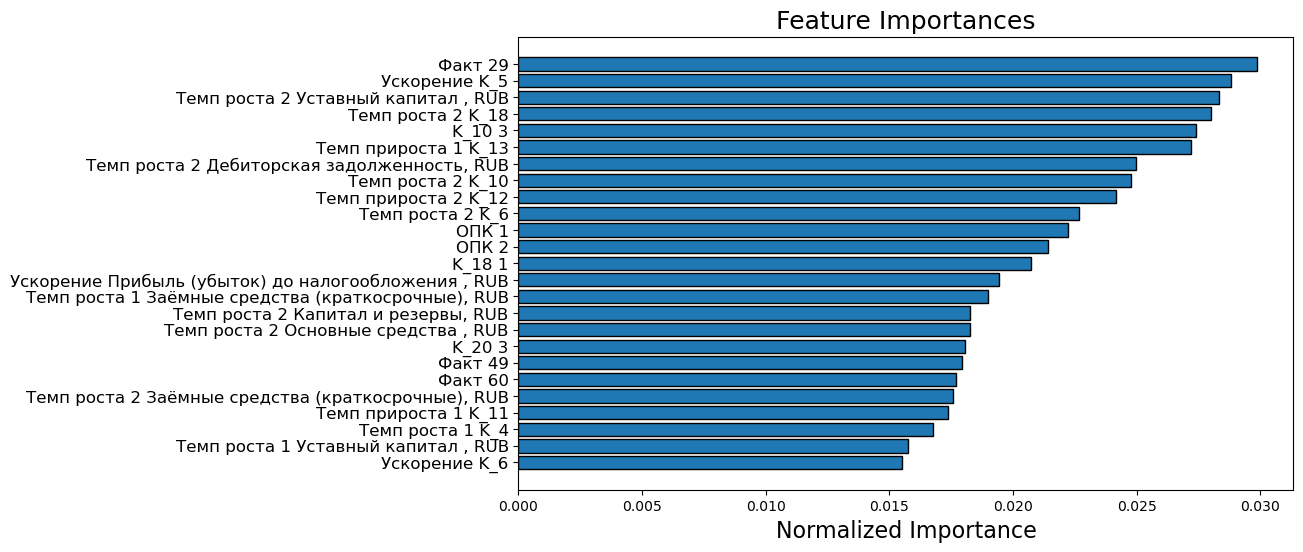

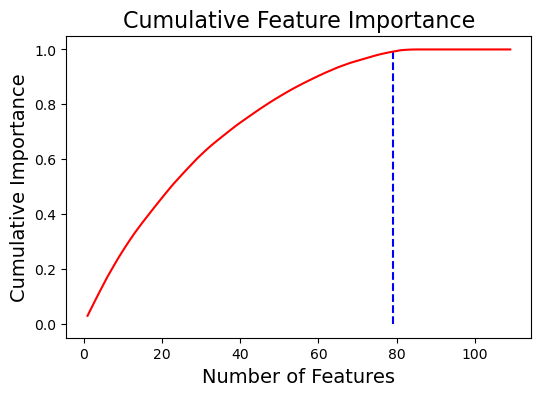

79 features required for 0.99 of cumulative importance


In [22]:
fs.plot_feature_importances(plot_n=25, threshold=0.99)

Немного перемешался порядок, но в первых рядах практически теже признаки. 

In [23]:
fs.identify_low_importance(cumulative_importance=0.99)

78 features required for cumulative importance of 0.99 after one hot encoding.
31 features do not contribute to cumulative importance of 0.99.



In [24]:
df_f_importances_without_collinearity = fs.feature_importances

In [25]:
df_f_importances_without_collinearity.to_csv('database/df_f_importances_without_collinearity_2020.csv', index=False)

In [26]:
index = df_f_importances_without_collinearity[df_f_importances_without_collinearity['importance'] == 0].index 
importance_features=df_f_importances_without_collinearity.drop(index, axis=0)
importance_features = importance_features.sort_values('importance', ascending=False)

importance_features = list(importance_features['feature'])

In [27]:
# Запись в файл списка признаков
file = open('feature_list/2020/fs_importances.txt', 'w')
for index in importance_features:
     file.write(index + '\n')
file.close()